In [6]:
import pandas as pd

In [7]:
df = pd.read_csv('/Users/rokatyy/Desktop/ML1/bioresponse.csv')

In [8]:
from sklearn.model_selection import train_test_split
Y = df["Activity"] 
X = df.loc[ : , df.columns != "Activity"]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=555)

In [23]:
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn import datasets, linear_model
from matplotlib import pyplot as plt
from sklearn.metrics import (
    precision_score, recall_score, accuracy_score, f1_score, log_loss, precision_recall_curve, roc_curve, roc_auc_score
)

def get_metrics(descr, test, pred, proba):
    print(descr)
    print(f"precision = {precision_score(test, pred):.4f}; recall = {recall_score(test, pred):.4f}; accuracy = {accuracy_score(test, pred):.4f}; f1 = {f1_score(test, pred):.4f}; log_loss = {log_loss(test, pred):.4f}")
    fig, (ax_pr, ax_roc) = plt.subplots(1, 2, figsize=(15, 5))
    precision, recall, threshold = precision_recall_curve(test, proba)
    fpr, tpr, thr = roc_curve(test, proba)

    ax_pr.plot(threshold, precision[:-1], label="precision")
    ax_pr.plot(threshold, recall[:-1], label="recall")
    ax_pr.set_xlabel("threshold")
    ax_pr.set_title("precision-recall curve")
    ax_pr.legend()
    ax_pr.grid()

    plt.plot(fpr, tpr, label=descr)
    ax_roc.set_xlabel("false positive rate")
    ax_roc.set_ylabel("true positive rate")
    ax_roc.set_title("ROC curve")
    ax_roc.legend(loc=4)
    ax_roc.grid()

In [13]:
# decision tree (max_depth = 5)
small_decision_tree = DecisionTreeClassifier(max_depth=5, random_state=555)
small_decision_tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=555)

In [14]:
# decision tree (max_depth = 50)
deep_decision_tree = DecisionTreeClassifier(max_depth=50, random_state=555)
deep_decision_tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=50, random_state=555)

In [15]:
# random forest (max_depth=5)
small_forest = RandomForestClassifier(max_depth=5)
small_forest.fit(x_train, y_train)

RandomForestClassifier(max_depth=5)

In [16]:
# random forest (max_depth=50)
deep_forest = RandomForestClassifier(max_depth=50)
deep_forest.fit(x_train, y_train)

RandomForestClassifier(max_depth=50)

In [17]:
# testing
SDTPredictedActivity = small_decision_tree.predict(x_test)
DDTPredictedActivity = deep_decision_tree.predict(x_test)
RFPredictedActivity = small_forest.predict(x_test)
DFPredictedActivity = deep_forest.predict(x_test)

Small decision tree
precision = 0.7613; recall = 0.8141; accuracy = 0.7628; f1 = 0.7868; log_loss = 8.1919


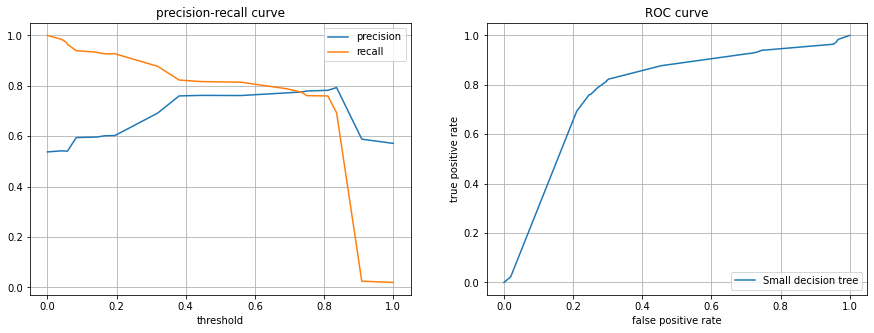

In [24]:
get_metrics(
    "Small decision tree", y_test,
    small_decision_tree.predict(x_test),
    small_decision_tree.predict_proba(x_test)[:, 1]
)

Deep decision tree
precision = 0.7158; recall = 0.7336; accuracy = 0.7002; f1 = 0.7246; log_loss = 10.3549


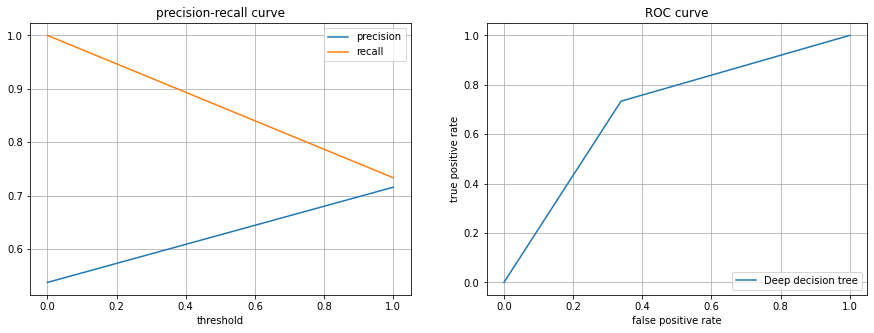

In [25]:
get_metrics(
    "Deep decision tree", y_test,
    deep_decision_tree.predict(x_test),
    deep_decision_tree.predict_proba(x_test)[:, 1]
)

Small random forest
precision = 0.7459; recall = 0.7856; accuracy = 0.7408; f1 = 0.7652; log_loss = 8.9512


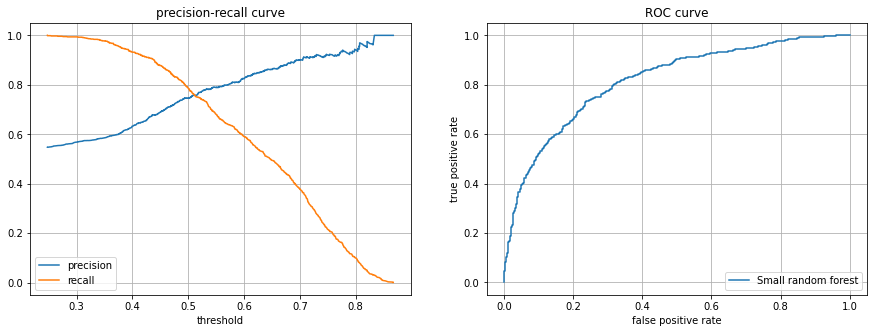

In [26]:
get_metrics(
    "Small random forest", y_test,
    small_forest.predict(x_test),
    small_forest.predict_proba(x_test)[:, 1]
)

Deep random forest
precision = 0.8026; recall = 0.8265; accuracy = 0.7975; f1 = 0.8144; log_loss = 6.9953


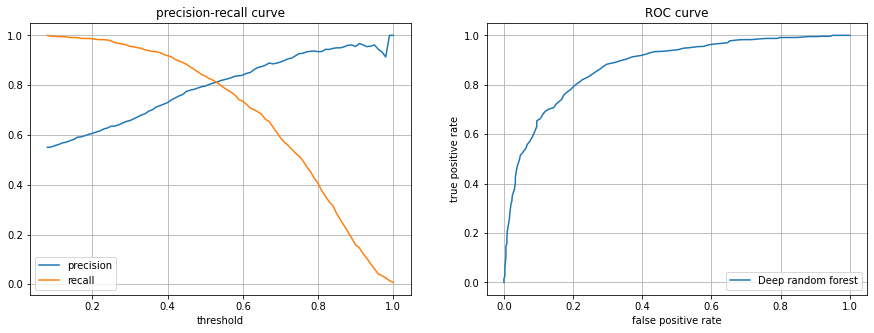

In [27]:
get_metrics(
    "Deep random forest", y_test,
    deep_forest.predict(x_test),
    deep_forest.predict_proba(x_test)[:, 1]
)

Avoid FN
precision = 0.6434; recall = 0.9120; accuracy = 0.6809; f1 = 0.7545; log_loss = 11.0223


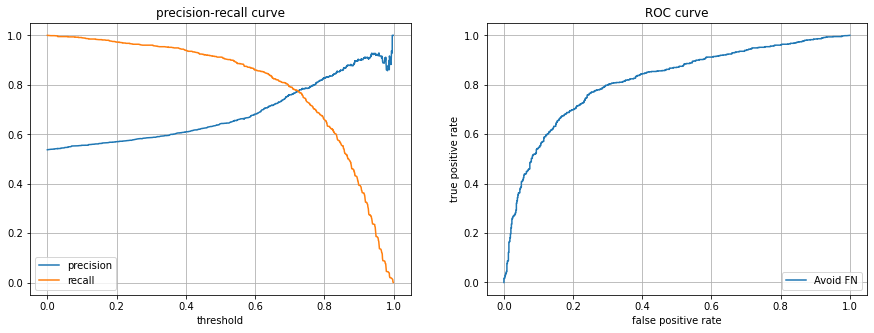

In [38]:
forest_fn = RandomForestClassifier(max_depth=50, class_weight={0: 1, 1: 49}, random_state=555)
forest_fn = forest_fn.fit(x_train, y_train)

get_metrics(
    "Avoid FN", y_test,
    forest_fn.predict(x_test), forest_fn.predict_proba(x_test)[:, 1]
)